In [1]:
import scvelo as scv
import scanpy as sc
scv.set_figure_params('scvelo')
scv.settings.presenter_view = True

In [5]:
adata = scv.read("../tmp/06.HS_BM_donor1.h5ad")
adata

AnnData object with n_obs × n_vars = 6195 × 17220
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype'
    var: 'features', 'spliced_features', 'unspliced_features'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

In [10]:
adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].astype('category')
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

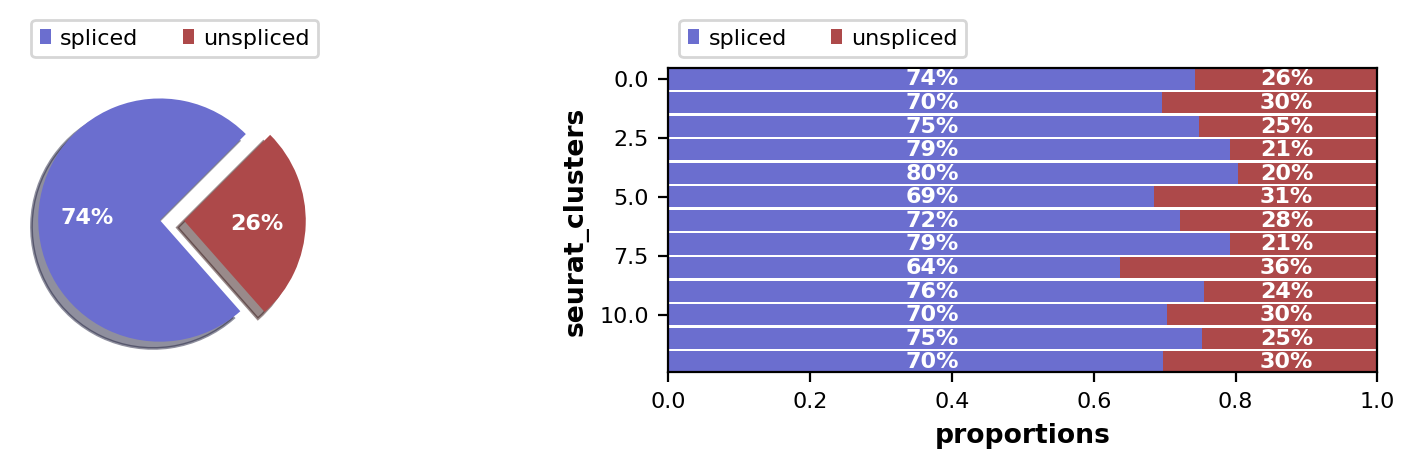

In [12]:
scv.pl.proportions(adata, groupby = "seurat_clusters")

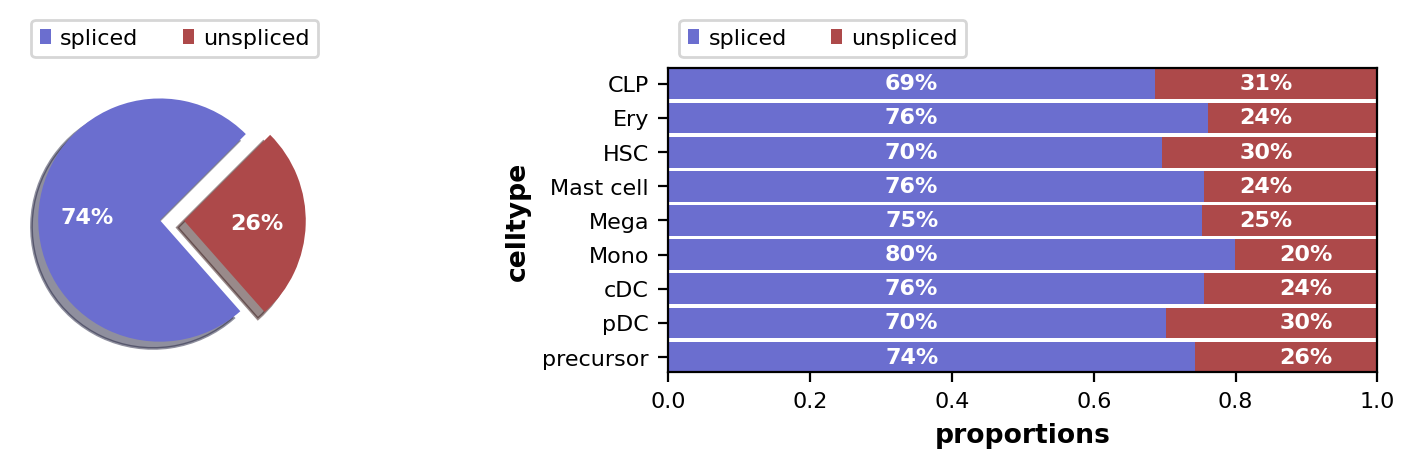

In [13]:
scv.pl.proportions(adata, groupby = "celltype")

In [14]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 9528 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


In [18]:
adata

AnnData object with n_obs × n_vars = 6195 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'features', 'spliced_features', 'unspliced_features', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

In [19]:
## default: it will perform the PCA when no "X_pca"
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
## if we want to use the stored cell embeddings
# scv.pp.moments(adata, n_pcs=30, use_rep="X_pca", n_neighbors=30)

computing neighbors
    finished (0:00:13) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [23]:
adata.layers

Layers with keys: spliced, unspliced, Ms, Mu

In [38]:
# scv.tl.velocity(adata, mode='steady_state')
# scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [39]:
adata.layers

Layers with keys: spliced, unspliced, Ms, Mu, velocity, variance_velocity

In [40]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/6195 [00:00<?, ?cells/s]

    finished (0:00:25) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [41]:
adata

AnnData object with n_obs × n_vars = 6195 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'features', 'spliced_features', 'unspliced_features', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'celltype_colors'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap', 'velocity_fr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_fr', embedded velocity vectors (adata.obsm)


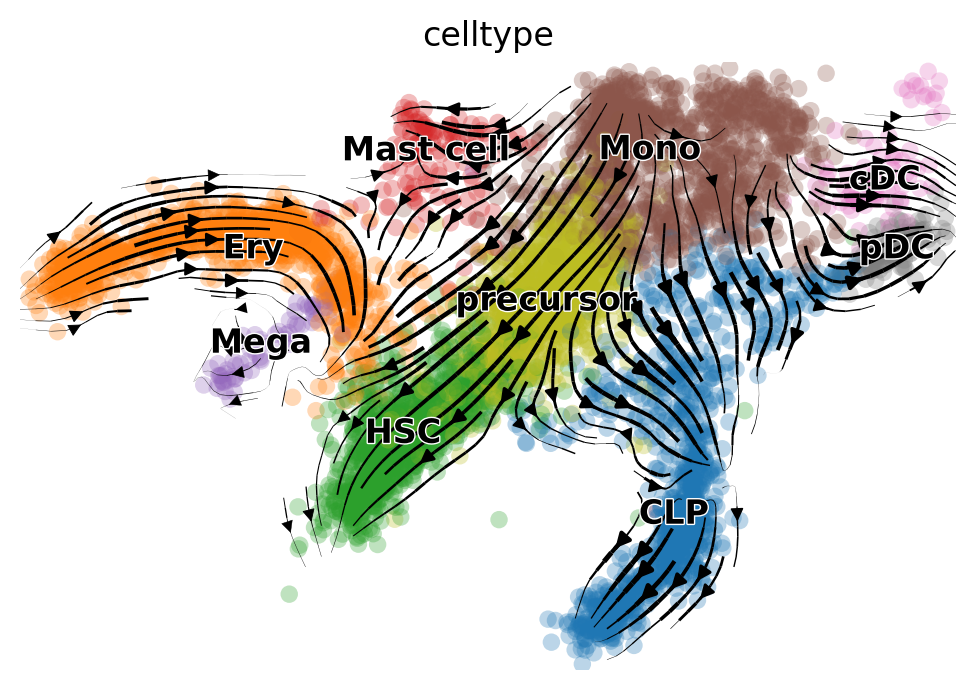

In [42]:
scv.pl.velocity_embedding_stream(adata, basis="X_fr", color="celltype")

In [ ]:
# scv.pl.velocity_embedding_grid(adata, basis='X_fr', color="celltype")

In [43]:
print(adata.var['velocity_genes'].sum(), adata.n_vars, adata.n_obs)

712 2000 6195


In [44]:
scv.tl.rank_velocity_genes(adata, groupby='celltype', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(10)

ranking velocity genes
    finished (0:00:05) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


/home/jarning/.conda/envs/scvelo/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


CLP      Ery        HSC Mast cell    Mega        Mono       cDC  \
0      PRKCE  ZNF385D       TFPI     ITGA4   PAPPA      FNDC3B      GAS7   
1    GRAMD1B  SLC40A1     PDZRN4     TTC27  PIEZO2        PLEK    PIK3R5   
2      CMTM7    DAAM1  LINC01122   CTNNBL1    NFIB       PARP8       EZR   
3      TTC7A   ZMYND8      CHRM3    PIEZO2     CD9      RAB27A     PTPRE   
4    C5orf56   PDLIM1  IL12A-AS1   RASGRP3    FBN1    SERPINB1       HCK   
5      MEF2A    KCNK5      CRHBP     RRBP1  SLC9A9  AL034397.3      CD74   
6       MYLK   SEMA3C      MEIS1    ZNF704  ANGPT1  AC092069.1  HLA-DQB1   
7  LINC00426     GMPR     LIMCH1   BHLHE40  INPP4B       ACTG1      CD44   
8     CYFIP2   ZBTB16      SNED1      TYMS    DNM3     CLEC12A    STK17B   
9        MME    MYCT1     SPTBN1    ATP10D    FLI1     COL23A1    UBE2E2   

       pDC precursor  
0   RUBCNL     MYO5C  
1    EPHB1     PADI4  
2   SETBP1      GYPC  
3     AFF3    ABLIM1  
4  SEPTIN9      CD69  
5    JAZF1   LNCAROD  
6      APP      CD99  
7   TGFBR2     CALN1  
8      ID2   LAPTM4B  
9    MYO1E      MSI2

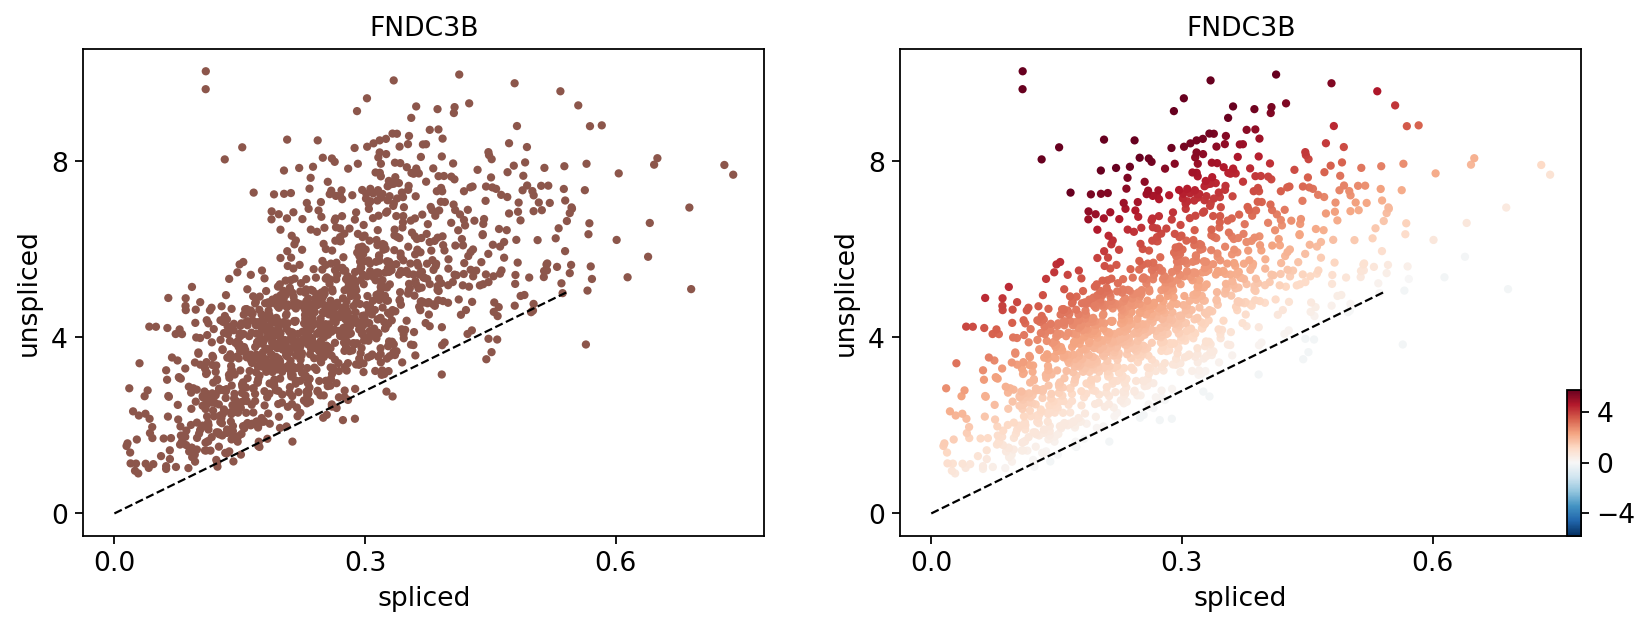

In [51]:
scv.pl.scatter(adata, 'FNDC3B', color=['celltype', 'velocity'])
# scv.pl.scatter(adata[adata.obs.celltype.isin(["Mono"]),], 'FNDC3B', color=['celltype', 'velocity'])

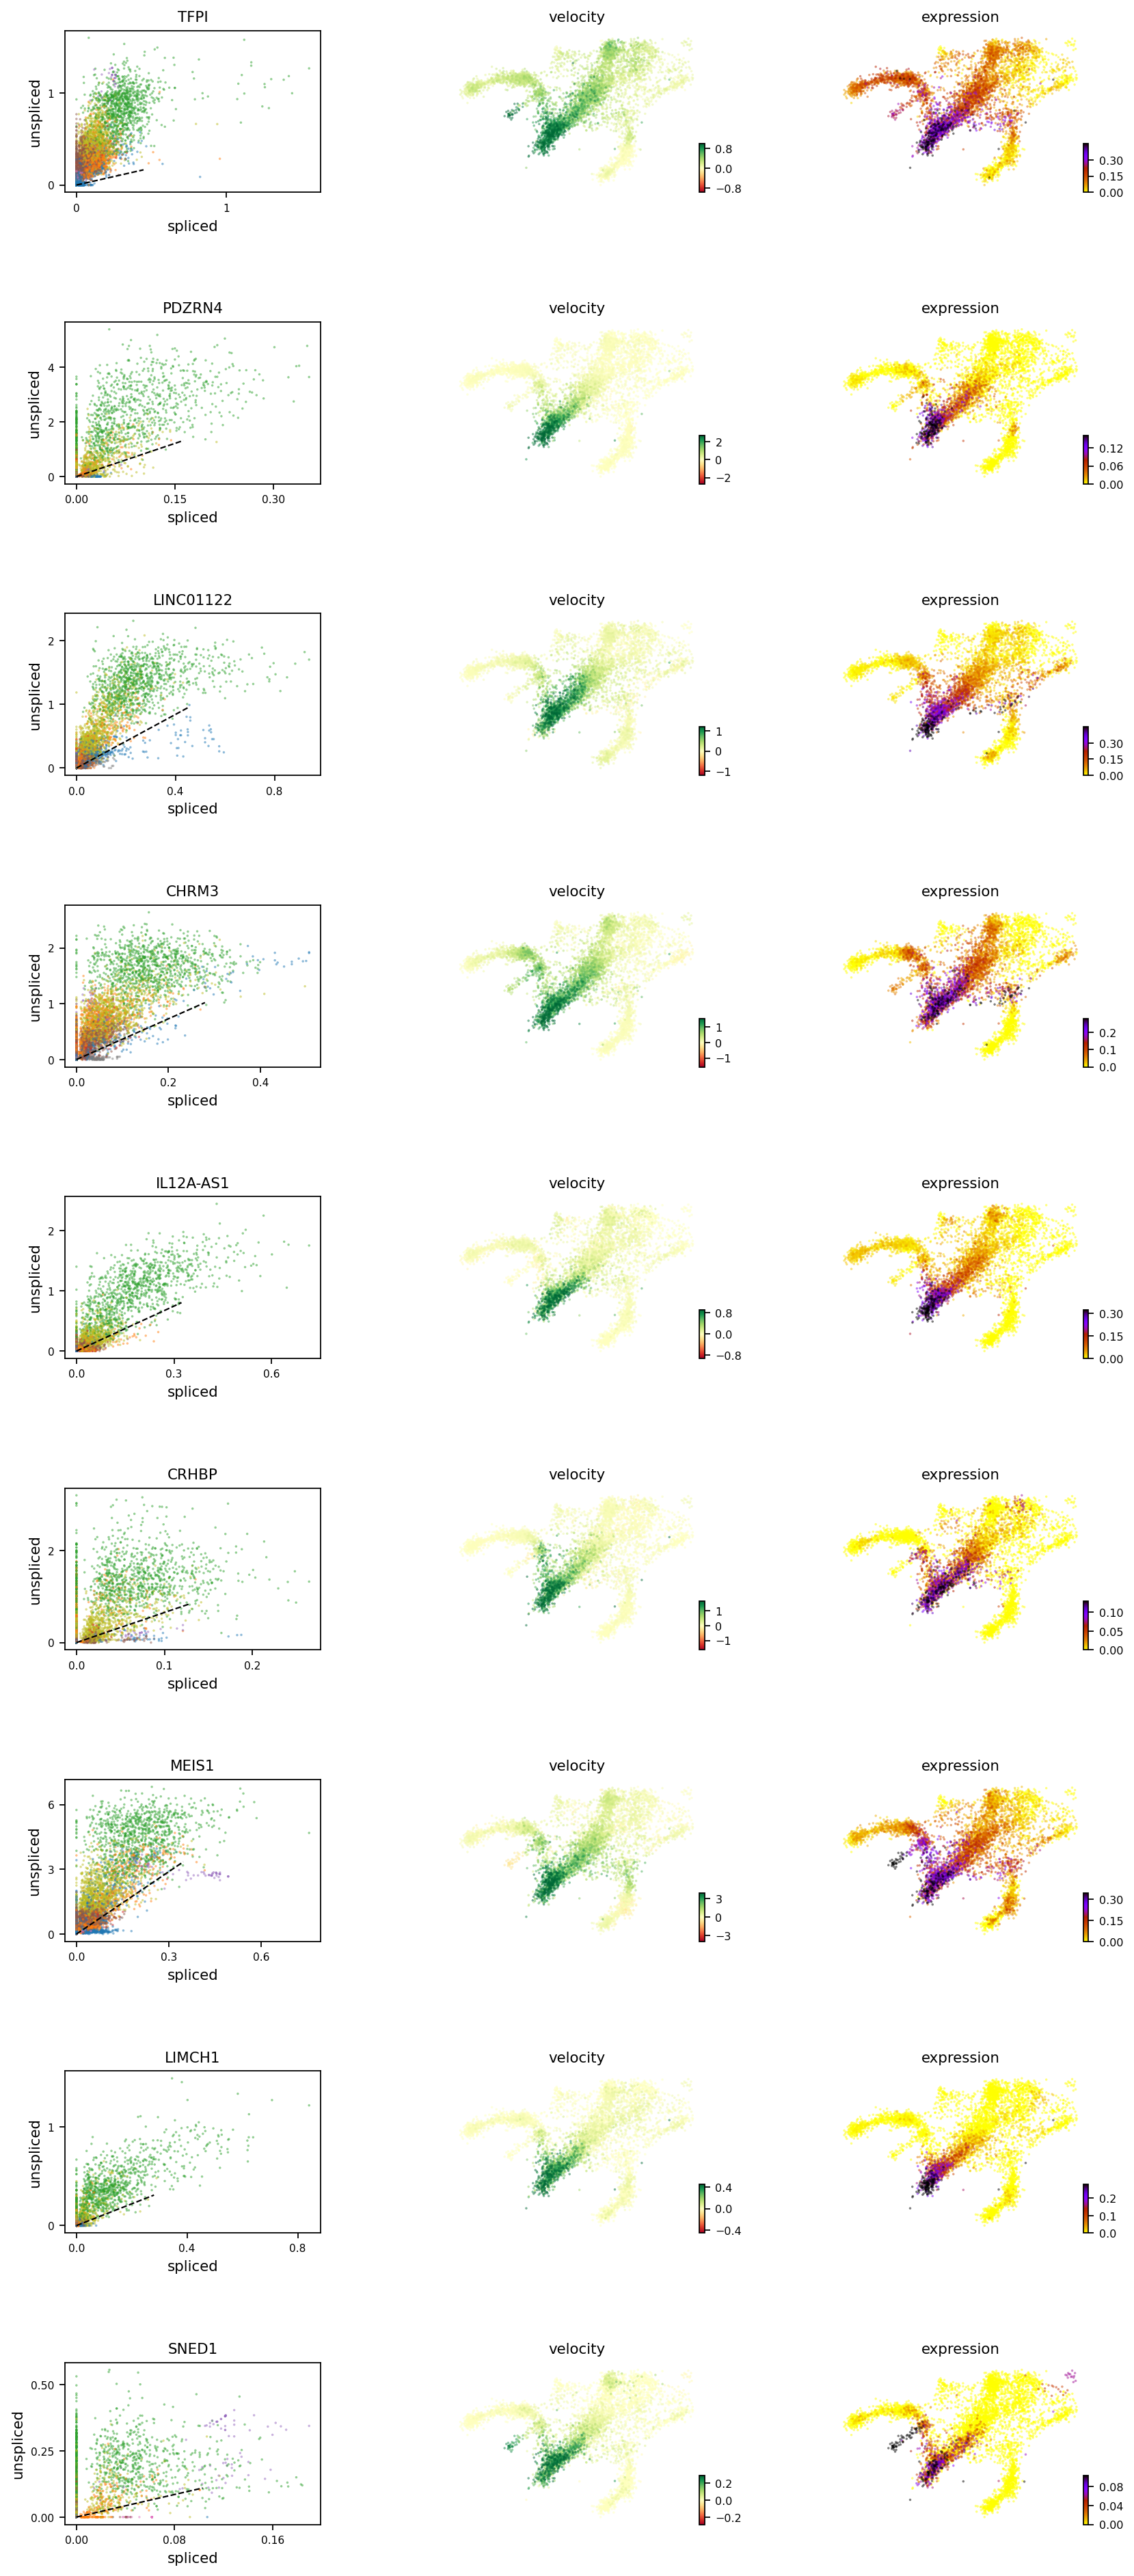

In [53]:
genes = df["HSC"].tolist()[0:9]
scv.pl.velocity(adata, genes, color="celltype", basis="X_fr", ncols=1, figsize=(6,5), dpi=600)